In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [2]:
# Reads in csv and skips first 3 rows, seperates by comma
data = pd.read_csv('disasters_per_year_per_state.csv', skiprows=2, sep=',' )
# Source: https://www.ncdc.noaa.gov/billions/mapping 

# Selecting all rows
rows = np.array(data.loc[:])

# Defining all the relevant columns
year = rows[:,0]
state = rows[:,1]
drought = rows[:,2]       
flood = rows[:,3]     
freeze = rows[:,4]  
sevstorm = rows[:,5]
tropcyclone = rows[:,6]
wildfire = rows[:,7]       
winterstorm = rows[:,8]

# Define some lists
year_list = np.arange(1980,2022,1)
drought_list, flood_list, freeze_list, sevstorm_list = [], [], [], []
tropcyclone_list, wildfire_list, winterstorm_list = [], [], []
# List of states
allstates = state[0:52]

## Billion-Dollar Disasters per year (Source: NOAA)

In [3]:
# Add up all values within the same year
for i in year_list:
    # Count
    drought_sum, flood_sum, freeze_sum, sevstorm_sum = 0, 0, 0, 0
    tropcyclone_sum, wildfire_sum, winterstorm_sum = 0, 0, 0
    for j in range(len(year)):
        if year[j] == i:
            drought_sum += drought[j]
            flood_sum += flood[j]
            freeze_sum += freeze[j]
            sevstorm_sum += sevstorm[j]
            tropcyclone_sum += tropcyclone[j]
            wildfire_sum += wildfire[j]
            winterstorm_sum += winterstorm[j]
    drought_list.append(drought_sum)
    flood_list.append(flood_sum)
    freeze_list.append(freeze_sum)
    sevstorm_list.append(sevstorm_sum)
    tropcyclone_list.append(tropcyclone_sum)
    wildfire_list.append(wildfire_sum)
    winterstorm_list.append(winterstorm_sum)

drought_array = np.array(drought_list)
flood_array = np.array(flood_list)
freeze_array = np.array(freeze_list)
sevstorm_array = np.array(sevstorm_list)
tropcyclone_array = np.array(tropcyclone_list)
wildfire_array = np.array(wildfire_list)
winterstorm_array = np.array(winterstorm_list)

In [4]:
# Functions
def Plot_peryear(yeararray,numberarray,label):
    label = str(label)
    plt.figure(figsize=(23,8))
    plot_peryear = plt.bar(list(yeararray), list(numberarray), width = 0.8)

    # Add the data value on head of the bar
    for value in plot_peryear:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 1.002*height,'%d' % int(height), ha='center', va='bottom')
    plt.title("{} events per year".format(label), fontsize=18)
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("{}s".format(label), fontsize=18)
    plt.xticks(yeararray, rotation=45, fontsize=14)
    plt.show()
    
def Plot_perstate(statearray,numberarray,label):
    label = str(label)
    plt.figure(figsize=(23,8))
    plot_perstate = plt.bar(list(statearray), list(numberarray), width = 0.8)

    # Add the data value on head of the bar
    for value in plot_perstate:
        height = value.get_height()
        plt.text(value.get_x() + value.get_width()/2.,
                 1.002*height,'%d' % int(height), ha='center', va='bottom')
    plt.title("{} by state between 1980-2021".format(label), fontsize=18)
    plt.xlabel("State", fontsize=18)
    plt.ylabel("{}s".format(label), fontsize=18)
    plt.xticks(statearray, rotation=45, fontsize=14)
    plt.show()

def Count_by_State(disasterarray):
    disaster_list = []

    # Count drought in each state
    for k in allstates:
        count = 0   # reset count
        for l in range(len(state)):
            if state[l] == k:
                count += disasterarray[l]

        disaster_list.append(count)
    disastercount = np.array(disaster_list)
    return disastercount

# Drought

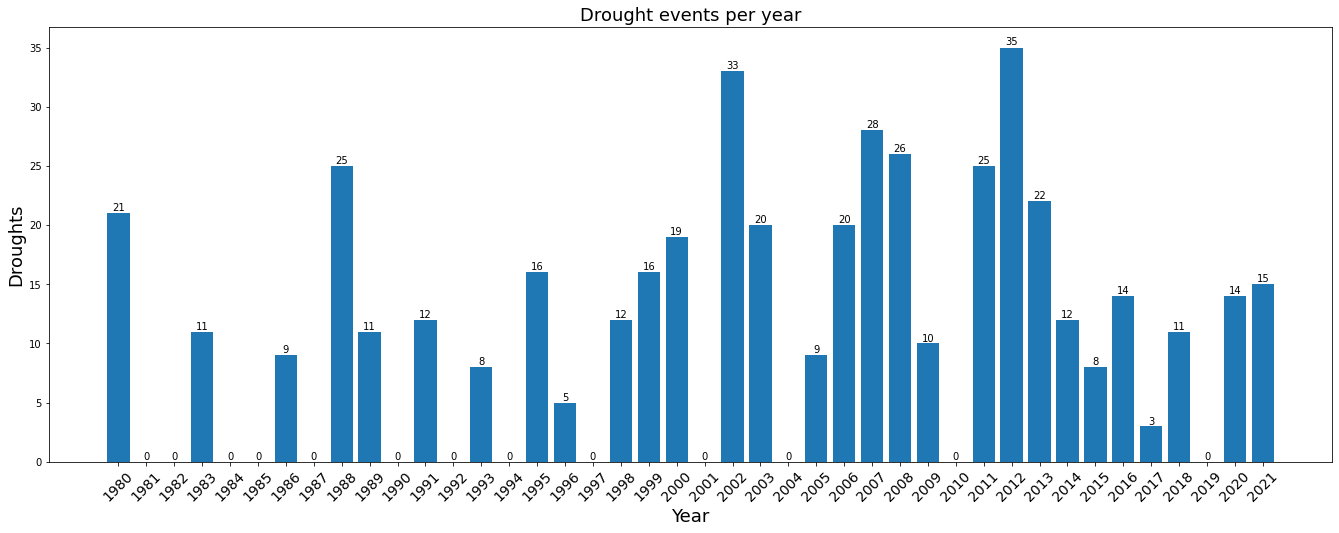

In [5]:
Plot_peryear(year_list,drought_array,'Drought')

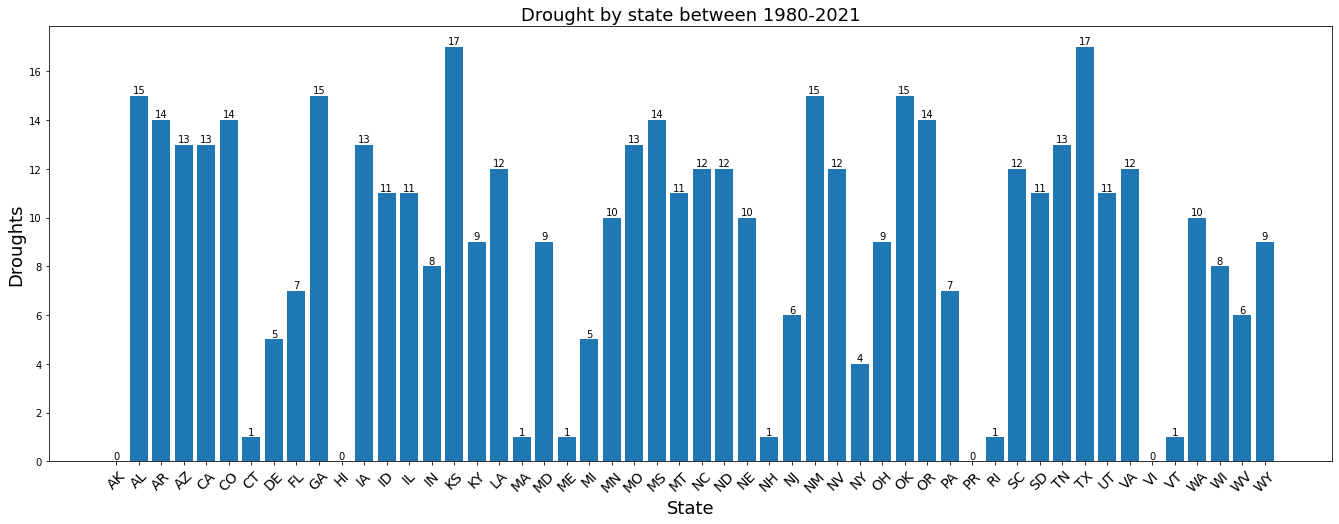

In [6]:
Plot_perstate(allstates,Count_by_State(drought),'Drought')

# Flooding

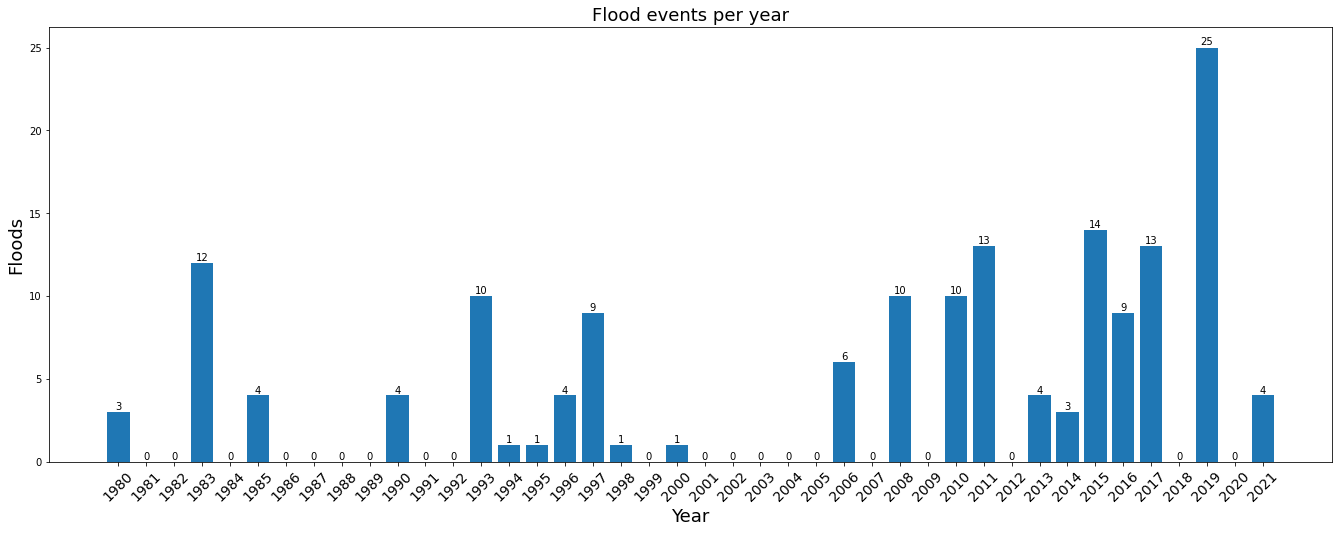

In [7]:
Plot_peryear(year_list,flood_array,'Flood')

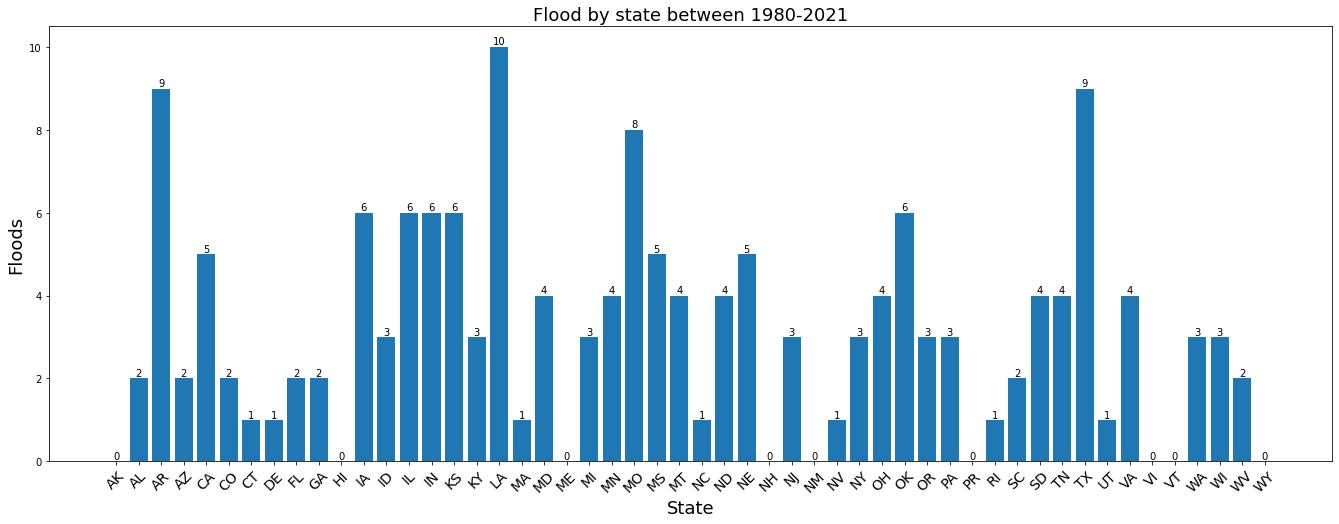

In [8]:
Plot_perstate(allstates,Count_by_State(flood),'Flood')

# Freeze

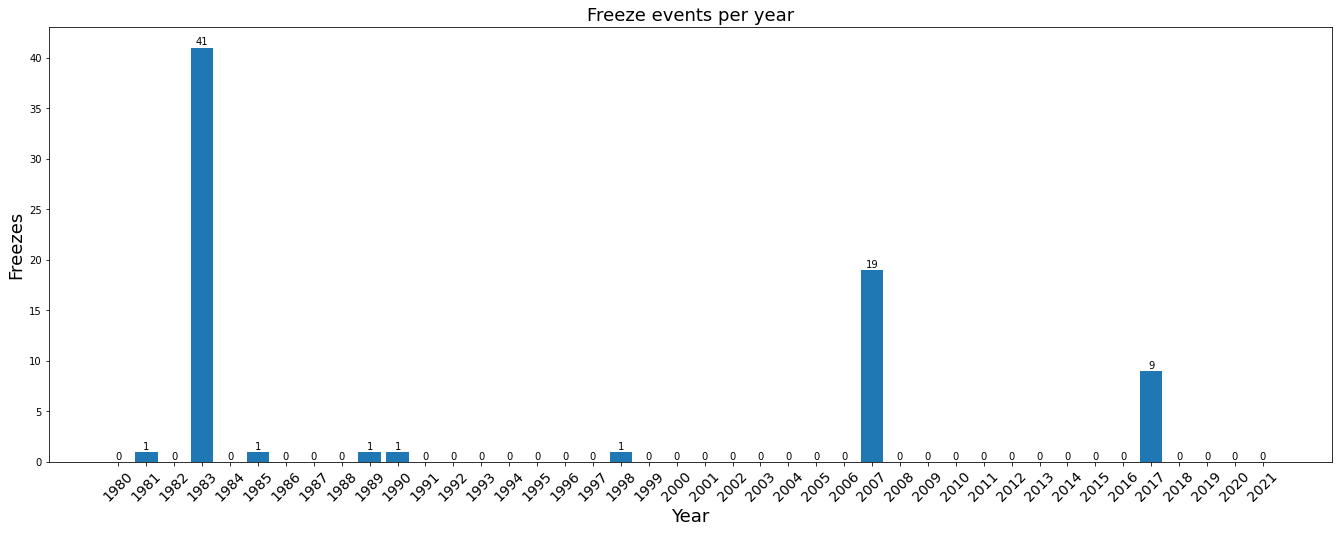

In [9]:
Plot_peryear(year_list,freeze_array,'Freeze')

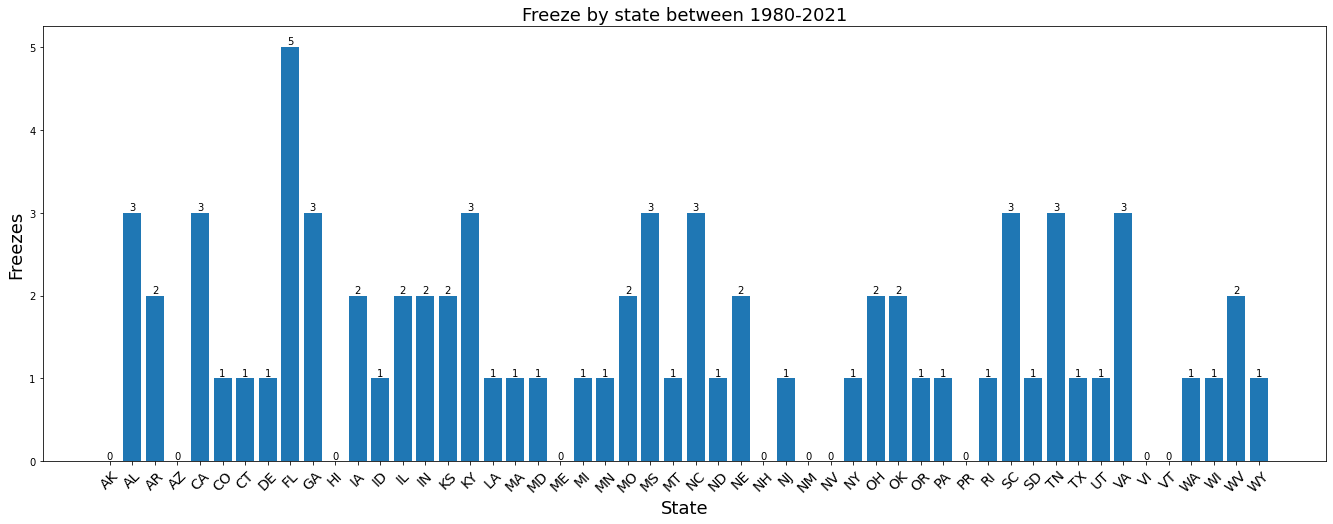

In [10]:
Plot_perstate(allstates,Count_by_State(freeze),'Freeze')

# Severe Storm

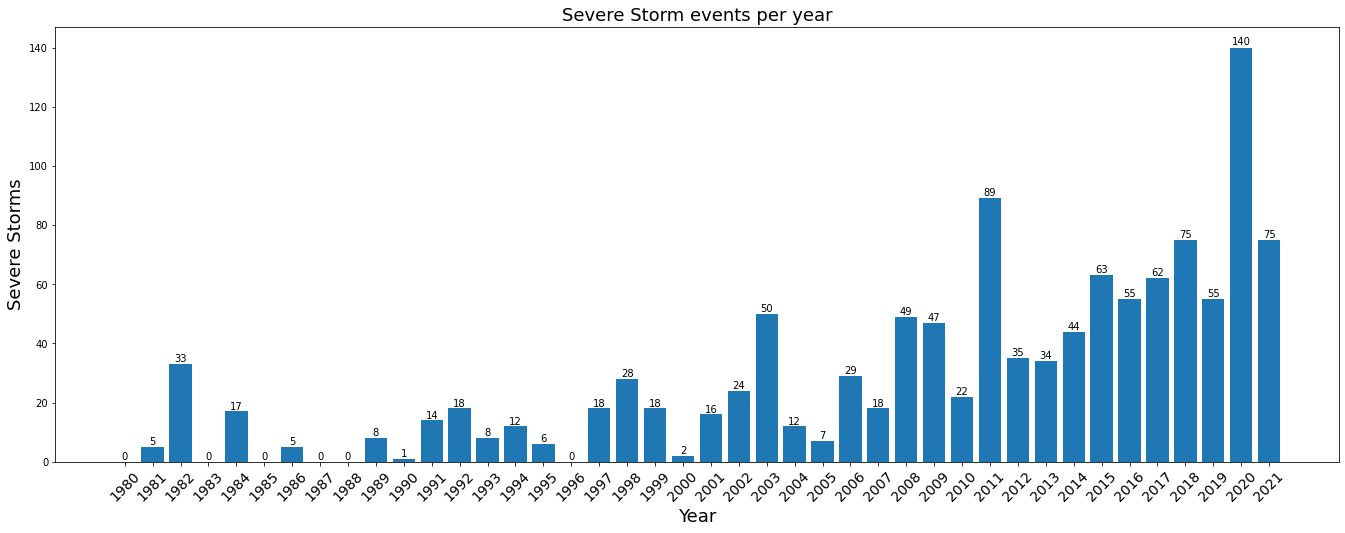

In [11]:
Plot_peryear(year_list,sevstorm_array,'Severe Storm')

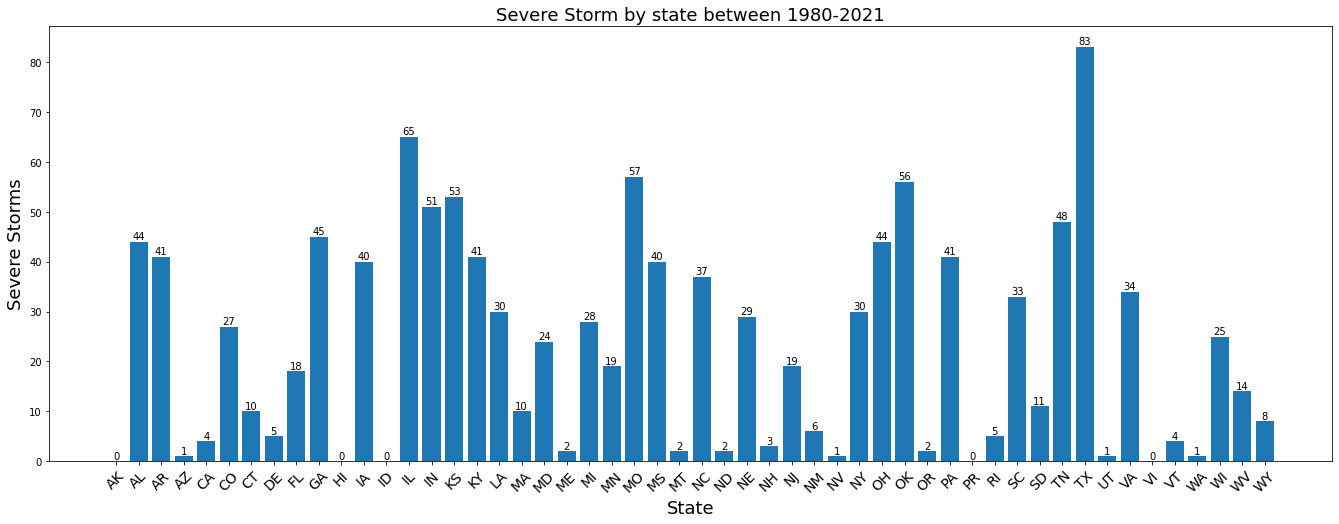

In [12]:
Plot_perstate(allstates,Count_by_State(sevstorm),'Severe Storm')

# Tropical Cyclone

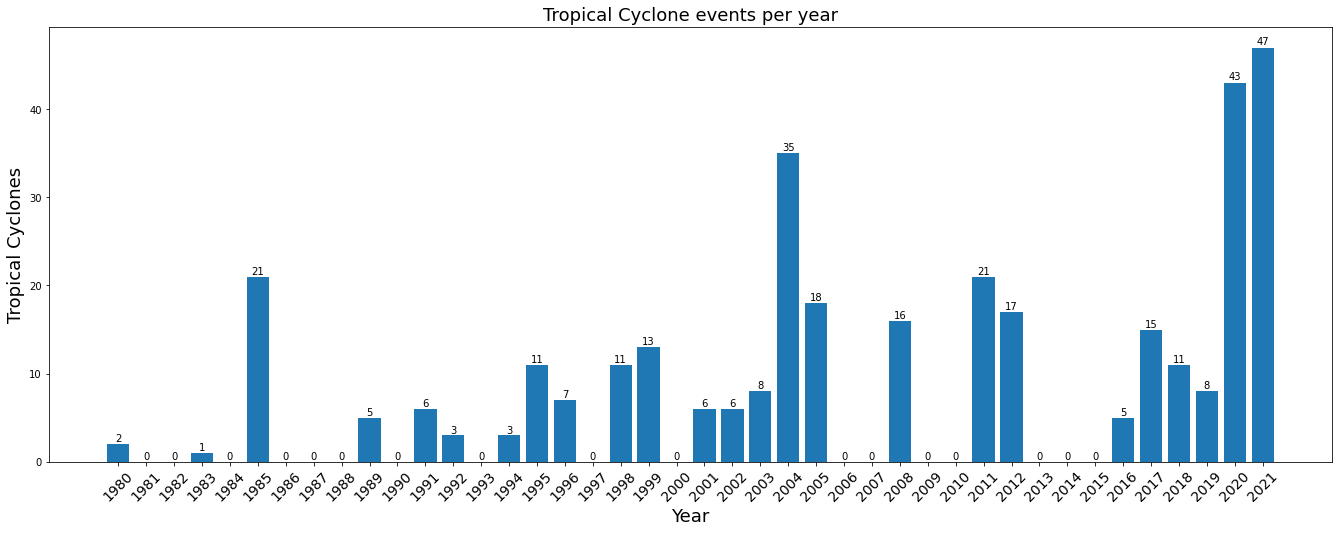

In [13]:
Plot_peryear(year_list,tropcyclone_array,'Tropical Cyclone')

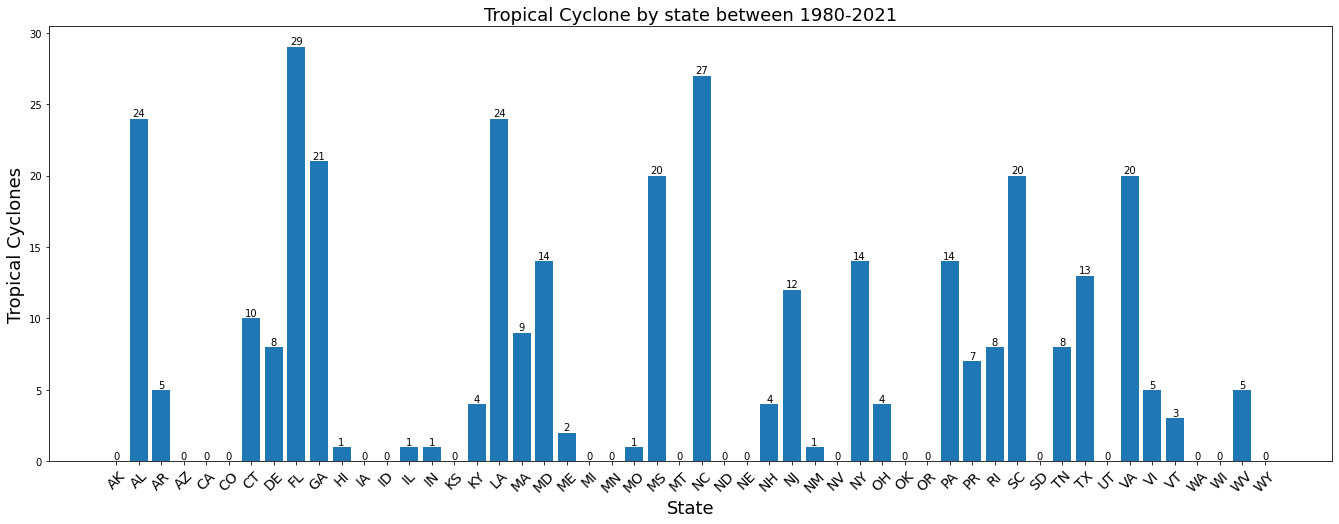

In [14]:
Plot_perstate(allstates,Count_by_State(tropcyclone),'Tropical Cyclone')

# Wildfire

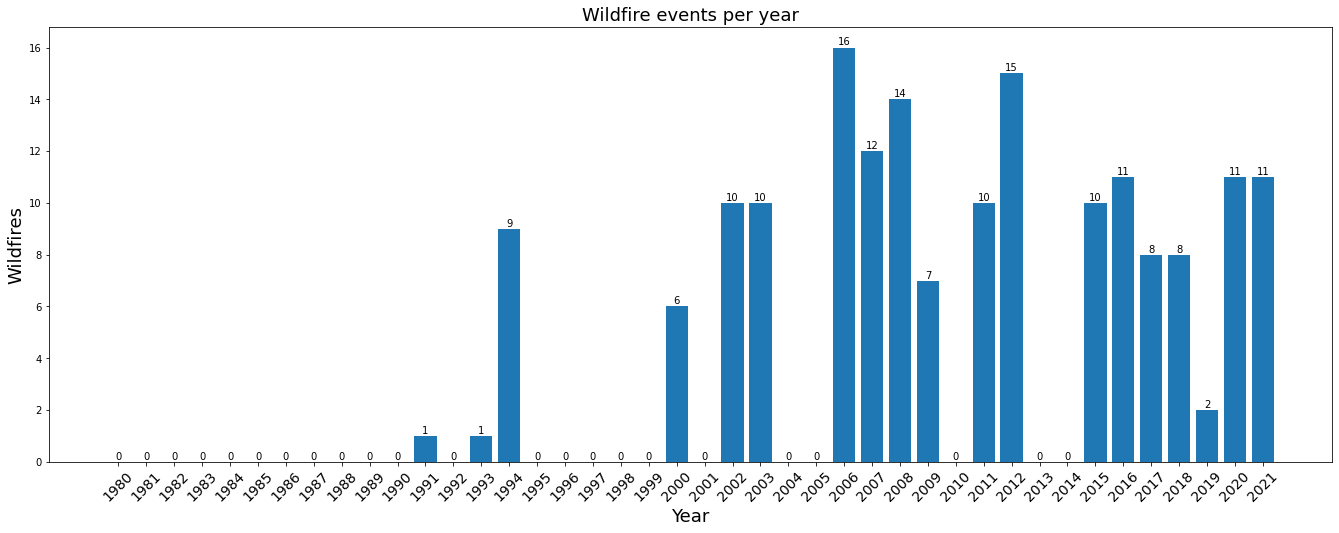

In [15]:
Plot_peryear(year_list,wildfire_array,'Wildfire')

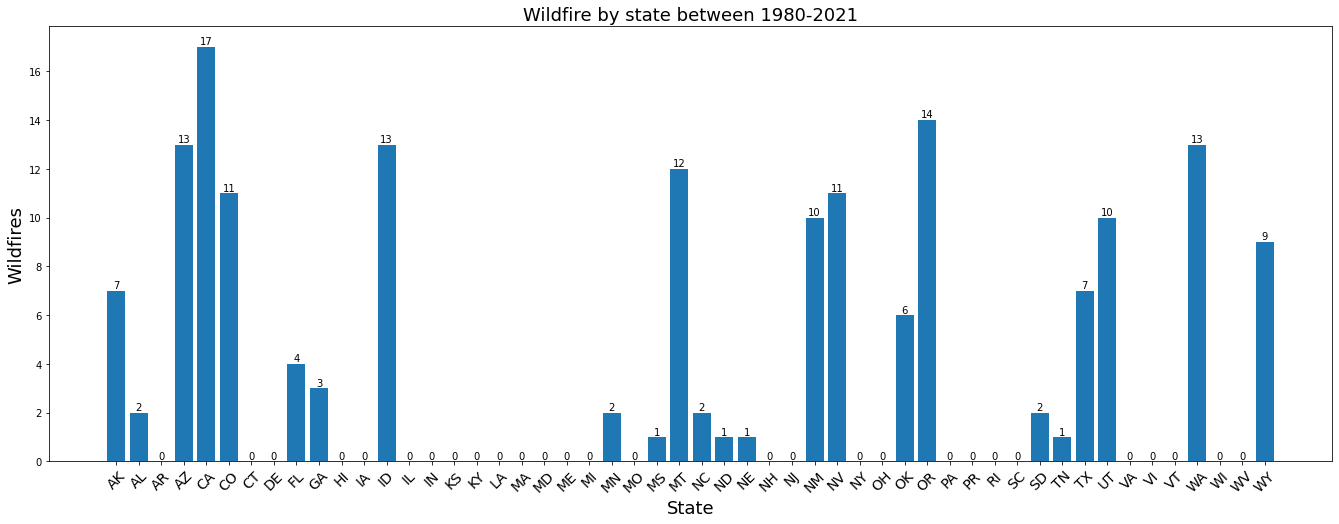

In [16]:
Plot_perstate(allstates,Count_by_State(wildfire),'Wildfire')

# Winter Storm

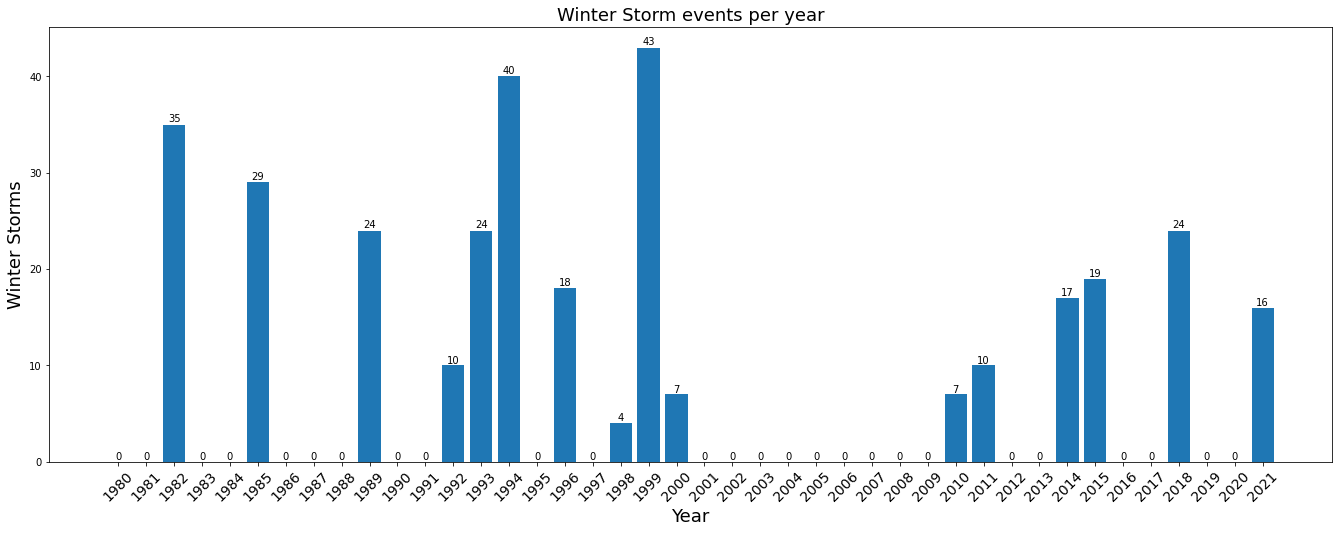

In [17]:
Plot_peryear(year_list,winterstorm_array,'Winter Storm')

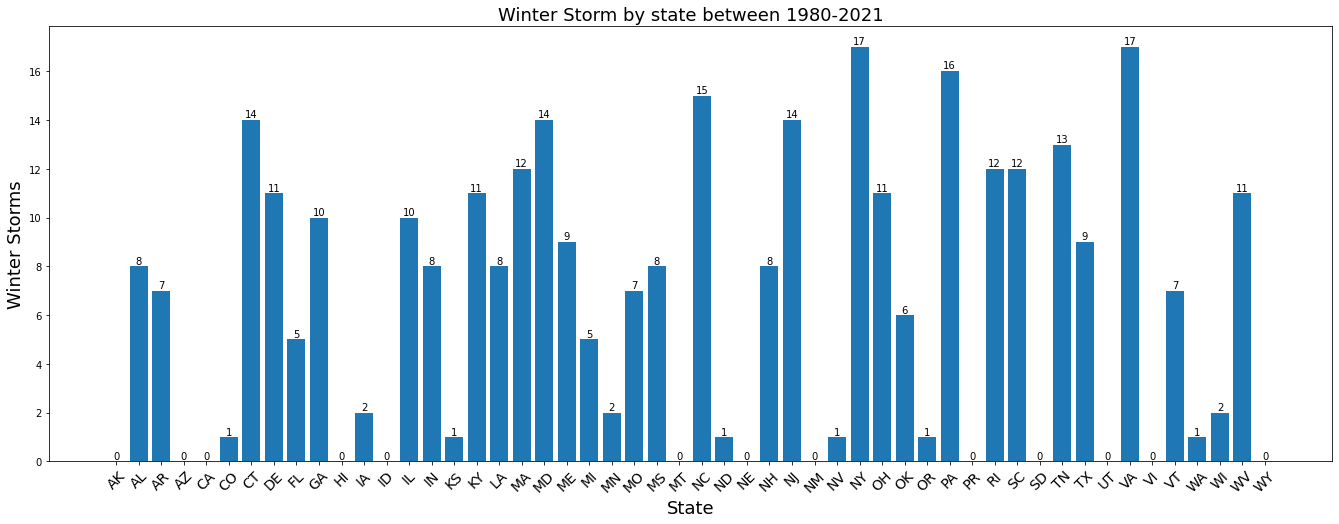

In [18]:
Plot_perstate(allstates,Count_by_State(winterstorm),'Winter Storm')